In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [9]:
 BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [11]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [12]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


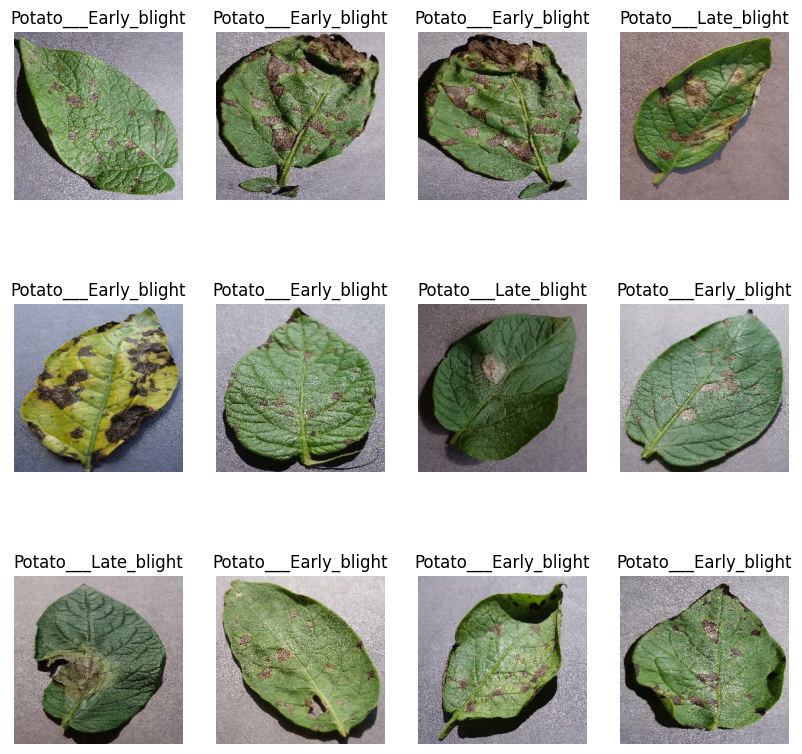

In [13]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [14]:
import matplotlib.pyplot as plt

In [13]:
!pip install matplotlib

In [4]:
import matplotlib.pyplot as plt

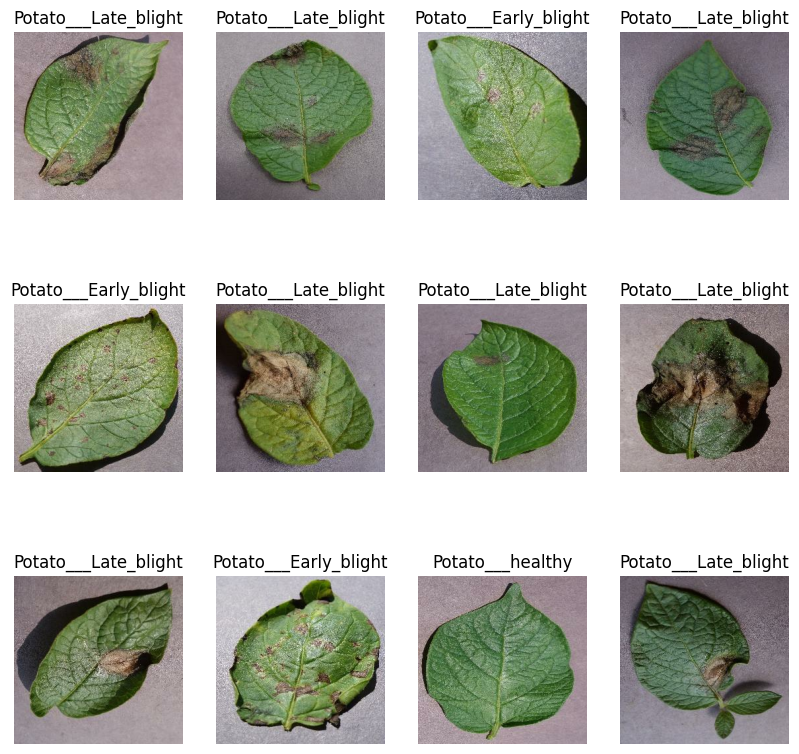

In [15]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [16]:
 
len(dataset)

68

In [17]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [18]:
train_ds = dataset.take(54)
len(train_ds)

54

In [19]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [20]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [21]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [22]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [23]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [25]:
  train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [26]:
len(train_ds)

54

In [27]:
len(val_ds)

6

In [28]:
len(test_ds)

8

In [29]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [30]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [31]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [33]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [36]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [37]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 92s 1s/step - loss: 0.8802 - accuracy: 0.5116 - val_loss: 0.7427 - val_accuracy: 0.6927
Epoch 2/50
54/54 [==============================] - 75s 1s/step - loss: 0.6802 - accuracy: 0.6979 - val_loss: 0.5690 - val_accuracy: 0.7604
Epoch 3/50
54/54 [==============================] - 72s 1s/step - loss: 0.5789 - accuracy: 0.7361 - val_loss: 0.4690 - val_accuracy: 0.8229
Epoch 4/50
54/54 [==============================] - 72s 1s/step - loss: 0.3632 - accuracy: 0.8519 - val_loss: 0.6987 - val_accuracy: 0.8385
Epoch 5/50
54/54 [==============================] - 74s 1s/step - loss: 0.3133 - accuracy: 0.8825 - val_loss: 0.2311 - val_accuracy: 0.9115
Epoch 6/50
54/54 [==============================] - 72s 1s/step - loss: 0.2445 - accuracy: 0.8953 - val_loss: 0.3045 - val_accuracy: 0.9115
Epoch 7/50
54/54 [==============================] - 66s 1s/step - loss: 0.1947 - accuracy: 0.9219 - val_loss: 0.2649 - val_accuracy: 0.9323
Epoch 8/50
54/54 [==

In [38]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 7s 639ms/step - loss: 0.1297 - accuracy: 0.9492


In [39]:
history

In [41]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
type(history.history['loss'])

list

In [44]:
history.history['loss']

[0.8801960349082947,
 0.6802407503128052,
 0.578887403011322,
 0.363201767206192,
 0.31332457065582275,
 0.24450530111789703,
 0.19465582072734833,
 0.17694664001464844,
 0.16540345549583435,
 0.15817028284072876,
 0.14055541157722473,
 0.13525250554084778,
 0.10783357173204422,
 0.10229498147964478,
 0.08983978629112244,
 0.08104824274778366,
 0.07320678234100342,
 0.09012578427791595,
 0.11207260191440582,
 0.06840107589960098,
 0.058612972497940063,
 0.09298925846815109,
 0.05024147406220436,
 0.09727546572685242,
 0.09310415387153625,
 0.04395364224910736,
 0.06538788974285126,
 0.05528454855084419,
 0.042241331189870834,
 0.04693661257624626,
 0.05080290511250496,
 0.058376725763082504,
 0.040509939193725586,
 0.0506020151078701,
 0.027802573516964912,
 0.0407855287194252,
 0.03760473430156708,
 0.022641990333795547,
 0.04404064640402794,
 0.0282173790037632,
 0.060574788600206375,
 0.019059395417571068,
 0.024075698107481003,
 0.03267192468047142,
 0.04302360862493515,
 0.0253145

In [47]:
history.history['accuracy']

[0.5115740895271301,
 0.6979166865348816,
 0.7361111044883728,
 0.8518518805503845,
 0.8825231194496155,
 0.8952546119689941,
 0.921875,
 0.9311342835426331,
 0.9363425970077515,
 0.9351851940155029,
 0.9490740895271301,
 0.9467592835426331,
 0.9589120149612427,
 0.9612268805503845,
 0.9664351940155029,
 0.9728009104728699,
 0.9728009104728699,
 0.96875,
 0.9542824029922485,
 0.9722222089767456,
 0.9751157164573669,
 0.9646990895271301,
 0.9803240895271301,
 0.9646990895271301,
 0.9681712985038757,
 0.984375,
 0.9733796119689941,
 0.9791666865348816,
 0.9866898059844971,
 0.9837962985038757,
 0.9814814925193787,
 0.9809027910232544,
 0.9872685074806213,
 0.9797453880310059,
 0.9901620149612427,
 0.9832175970077515,
 0.9855324029922485,
 0.9901620149612427,
 0.9866898059844971,
 0.9866898059844971,
 0.9785879850387573,
 0.9936342835426331,
 0.9918981194496155,
 0.9918981194496155,
 0.9855324029922485,
 0.9924768805503845,
 0.9930555820465088,
 0.9861111044883728,
 0.9756944179534912,
 0

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

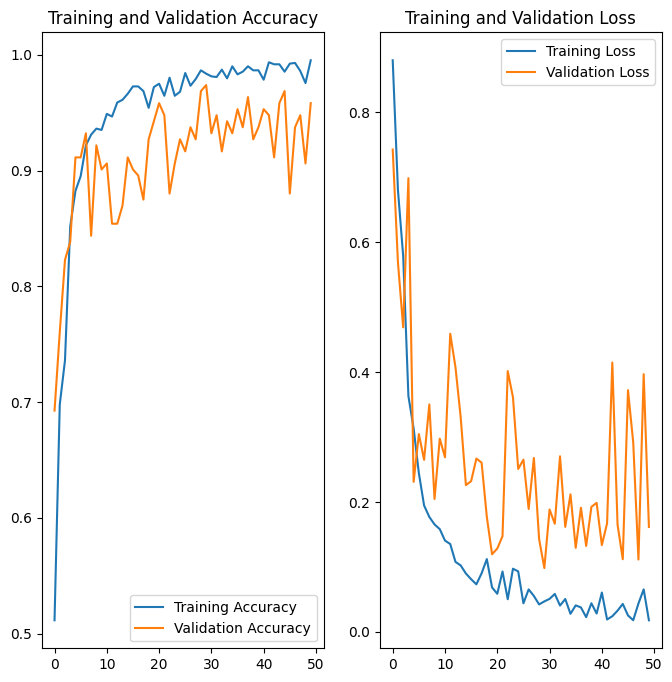

In [46]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 445ms/step
predicted label: Potato___Early_blight


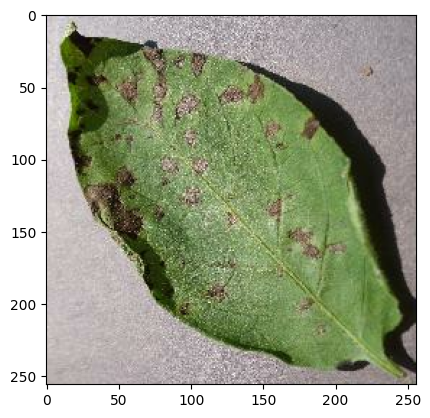

In [50]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 77ms/step


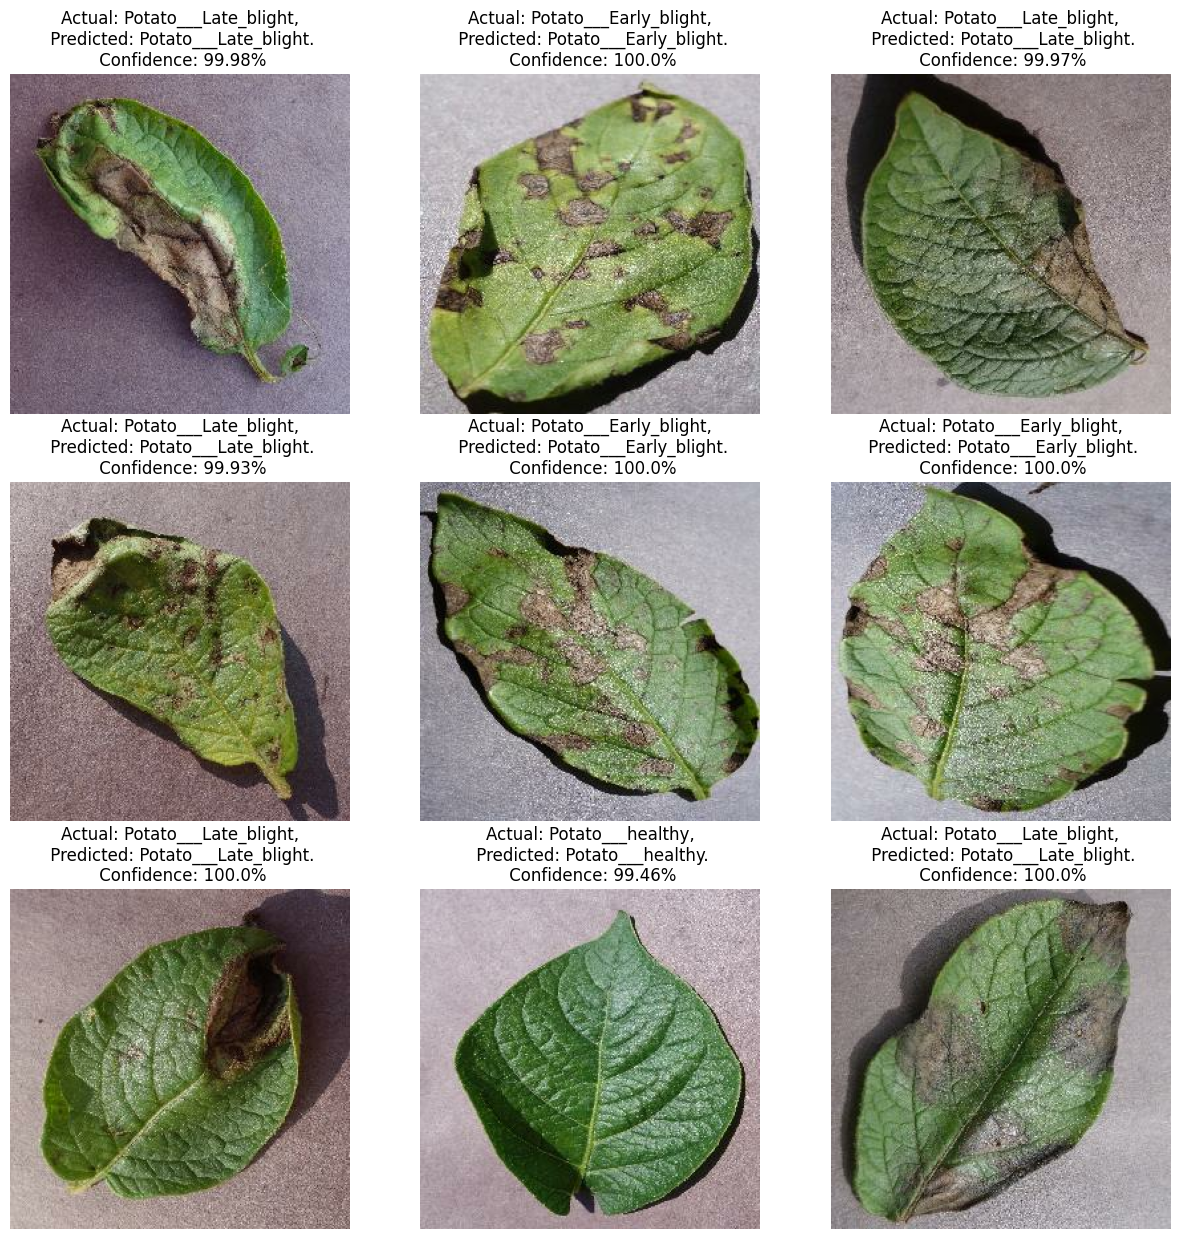

In [52]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [54]:
model_version=1
model.save(f"../model/{model_version}")

INFO:tensorflow:Assets written to: ../model/1\assets


INFO:tensorflow:Assets written to: ../model/1\assets
